In [17]:
import glob
import json

luds_to_quality_metrics_filepaths = glob.glob('organizer_lud_preprocessing/*_metrics.json')

quality_metric_values = []
all_luds_to_quality_metrics = {}
for filepath in luds_to_quality_metrics_filepaths:
    with open(filepath, 'r') as f:
        luds_to_quality_metrics = json.load(f)

    for lud, quality in luds_to_quality_metrics.items():
        quality_metric_values.append(quality)
        all_luds_to_quality_metrics[lud] = quality

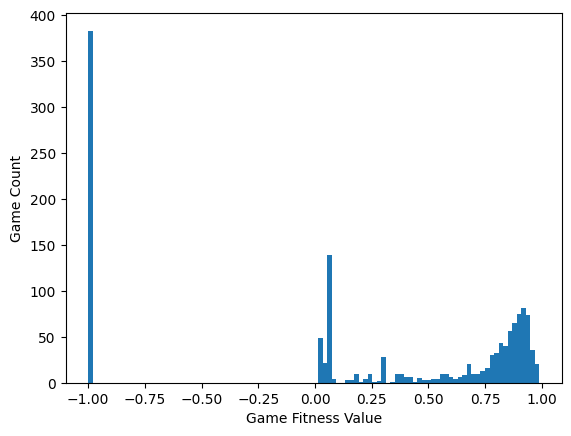

In [11]:
from matplotlib import pyplot as plt
import numpy as np

quality_metric_values = np.array(quality_metric_values)
quality_metric_values = np.clip(quality_metric_values, -1, 1)

plt.hist(quality_metric_values, bins=100)
plt.xlabel('Game Fitness Value')
plt.ylabel('Game Count')

plt.show()

In [13]:
sum(quality_metric_values > 0.5) / len(quality_metric_values)

0.48943918426802624

In [22]:
import pandas as pd

predictions_df = pd.read_csv('../predictions/catboost_41828_10_20iter_100round_gpu_drop-NumTopSites.csv')

prediction_errors = abs((predictions_df['utility_agent1'] - predictions_df['prediction']).to_numpy())
prediction_errors[:5]

array([0.35172901, 0.24539824, 0.19197727, 0.32886398, 0.43816072])

In [15]:
import polars as pl

train_df = pl.read_csv('../data/from_organizers/train.csv')
train_luds = train_df['LudRules'].to_list()

In [18]:
train_quality_values = []
for lud in train_luds:
    train_quality_values.append(all_luds_to_quality_metrics[lud])

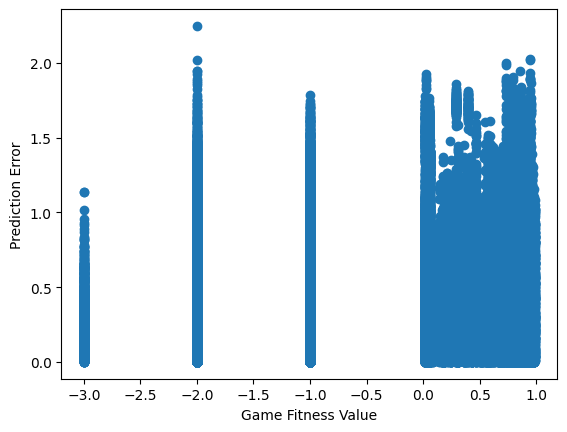

In [34]:
plt.scatter(train_quality_values, prediction_errors)

# plt.xlim(0, 1)

plt.xlabel('Game Fitness Value')
plt.ylabel('Prediction Error')
plt.show()

In [33]:
from scipy.stats import pearsonr

pearsonr(train_quality_values, prediction_errors)

PearsonRResult(statistic=0.02823599844589044, pvalue=2.3467534320330278e-42)

In [44]:
filtered_quality_values = []
filtered_prediction_errors = []

for quality, error in zip(train_quality_values, prediction_errors):
    if quality < 0:
        filtered_quality_values.append(quality)
        filtered_prediction_errors.append(error)

print(np.mean(np.array(filtered_prediction_errors)**2)**0.5)

pearsonr(filtered_quality_values, filtered_prediction_errors)

0.4064070251179752


PearsonRResult(statistic=0.057200261815022906, pvalue=1.8670293940420732e-46)